In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Charger le jeu de donnée
df = pd.read_csv('drug_consumption.data')

C:\Users\Maiss\AppData\Local\Temp\ipykernel_30356\49410509.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})


Les 20 corrélations les plus élevées :
    Variable 1 Variable 2  Corrélation
166        LSD  MUSHROOMS     0.668627
35   IMPULSIVE         SS     0.623120
100       COKE    ECSTASY     0.610783
92     CANABIS  MUSHROOMS     0.579934
122    ECSTASY        LSD     0.570946
121    ECSTASY     LEGALH     0.554134
90     CANABIS     LEGALH     0.554048
88     CANABIS    ECSTASY     0.552978
14     COUNTRY    CANABIS     0.551938
123    ECSTASY  MUSHROOMS     0.547536
152     LEGALH  MUSHROOMS     0.531819
54      AMPHET       COKE     0.530951
110      CRACK     HEROIN     0.527120
55      AMPHET    ECSTASY     0.521537
91     CANABIS        LSD     0.521048
76      BENZOS       METH     0.519292
93     CANABIS   NICOTINE     0.515145
120    ECSTASY   KETAMINE     0.508329
52      AMPHET     BENZOS     0.500642
18     COUNTRY        LSD     0.498263


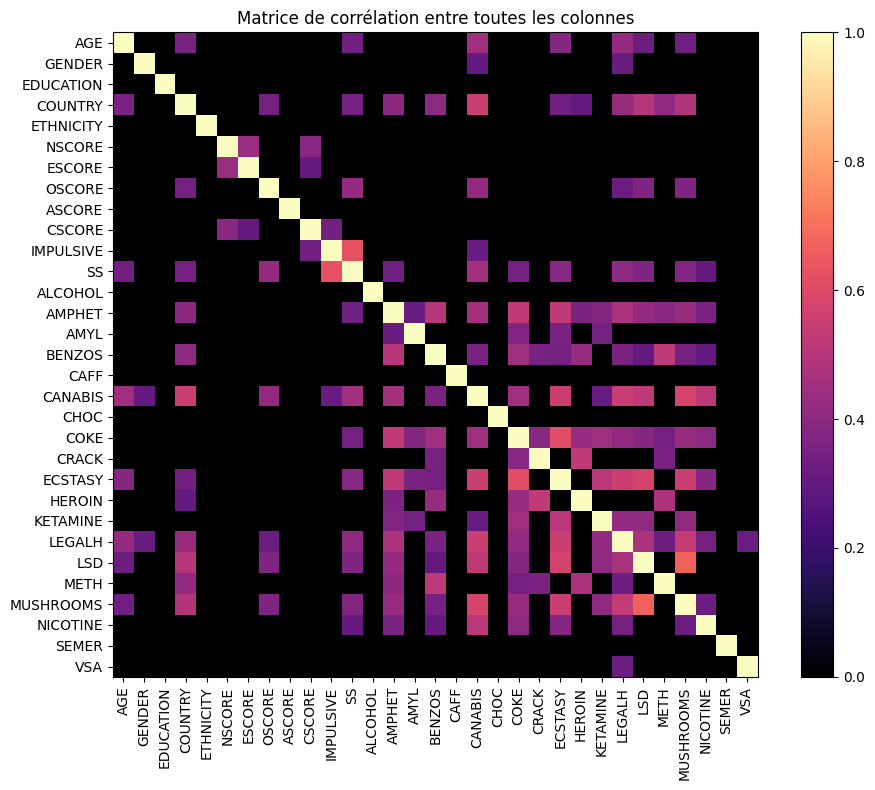

In [9]:
# On compare l'age et la consommation d'alcool

# on fait une matrice de corrélation entre l'age et la consommation d'alcool

# on transforme les données des colonnes en float
# CL0 -> 0
# CL1 -> 1
# CL2 -> 2
# CL3 -> 3
# CL4 -> 4
# CL5 -> 5
# CL6 -> 6

for column in df.columns:
    if column != 'ID':
        df[column] = df[column].replace({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})
        df[column] = df[column] - np.mean(df[column])
        df[column] = df[column] / np.std(df[column])



# On enleve la colonne ID
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])


corr = df.corr()

# on met un seuil pour ne garder que les corrélations significatives
SEUIL = 0.3
corr = corr[(corr >= SEUIL) | (corr <= -SEUIL)]
# On remplace les NaN par 0
corr = corr.fillna(0)
# on fait la valeur absolue de la matrice de corrélation
corr = corr.abs()

# Afficher les 5 corrélations les plus élevées en enlevant les doubles
corr_top = corr.unstack()
corr_top = corr_top[corr_top != 1]
corr_top = corr_top[corr_top > SEUIL]
corr_top = corr_top.reset_index()
corr_top.columns = ['Variable 1', 'Variable 2', 'Corrélation']
corr_top = corr_top.drop_duplicates(subset=['Corrélation'])
corr_top = corr_top.sort_values(by='Corrélation', ascending=False)
print("Les 20 corrélations les plus élevées :")
print(corr_top.head(20))


# On affiche la matrice de corrélation
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='magma', interpolation='none')

plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Matrice de corrélation entre toutes les colonnes')
plt.tight_layout()

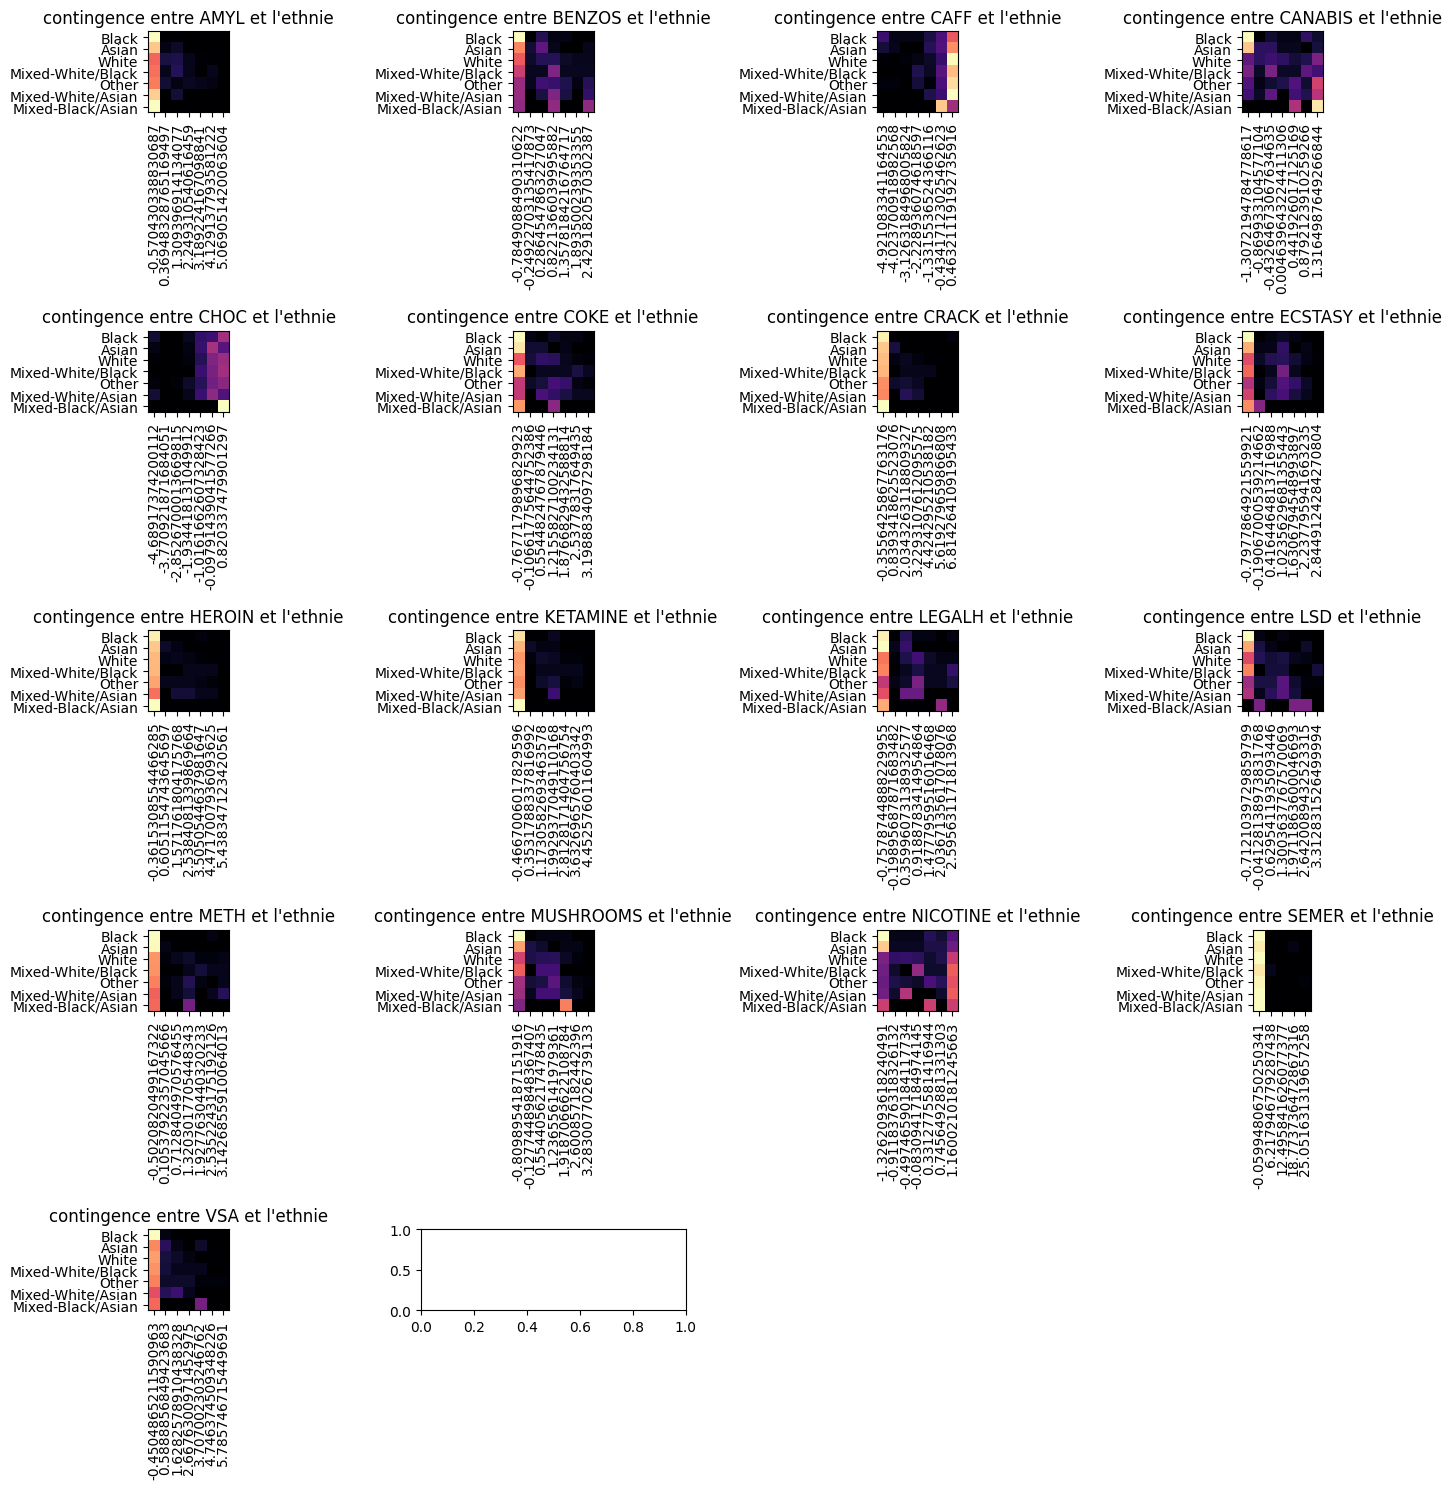

In [10]:

# - CL0 → Never Used
# - CL1 → Used over a Decade 
# - CL2 → Used in Last Decade
# - CL3 → Used in Last Year
# - CL4 → Used in Last Month
# - CL5 → Used in Last Week
# - CL6 → Used in Last Day
QUALITATIVE_LABELS = {
    'AGE':["18-24","25-34","35-44","45-54","55-64","65+"],
    'GENDER':["Homme", "Femme"],
    'EDUCATION':["a quitté l'école avant 16 ans",
                 "a quitté l'école à 16 ans",
                 "a quitté l'école à 17 ans",
                 "a quitté l'école à 18 ans",
                 "a fait un peu d'université mais n'as pas de diplôme ou de certificat",
                 "a un certificat ou diplome professionel",
                 "a un diplome universitaire (Bac+3)",
                 "a un Master (Bac+5)",
                 "a un doctorat (Bac+8+)"],
    'COUNTRY':['USA', 'New Zealand', 'Other', 'Australia', 'Republic of Ireland', 'Canada', 'UK'],
    'ETHNICITY':['Black', 'Asian', 'White', 'Mixed-White/Black', 'Other', 'Mixed-White/Asian', 'Mixed-Black/Asian'],
}
COUNTRY = ['USA', 'New Zealand', 'Other', 'Australia', 'Republic of Ireland', 'Canada', 'UK']
ETHNICITY = ['Black', 'Asian', 'White', 'Mixed-White/Black', 'Other', 'Mixed-White/Asian', 'Mixed-Black/Asian']
CONSOMATION = {"CL0":"Never Used",
                "CL1":"Used over a Decade",
                "CL2":"Used in Last Decade",
                "CL3":"Used in Last Year",
                "CL4":"Used in Last Month",
                "CL5":"Used in Last Week",
                "CL6":"Used in Last Day"}
DRUGS = df.columns[14:]
figure, ax = plt.subplots(5, 4, figsize=(15, 15))
for i,drug in enumerate(DRUGS):
    contingence = pd.crosstab(df['ETHNICITY'], df[drug])
    contingence = contingence.div(contingence.sum(axis=1), axis=0)
    contingence = contingence.fillna(0)
    contingence = contingence.abs()
    ax[i // 4, i%4].imshow(contingence, cmap='magma', interpolation='none')
    ax[i // 4, i%4].set_xticks(range(len(contingence.columns)))
    ax[i // 4, i%4].set_xticklabels(contingence.columns, rotation=90)
    ax[i // 4, i%4].set_yticks(range(len(ETHNICITY)))
    ax[i // 4, i%4].set_yticklabels(ETHNICITY)
    ax[i // 4, i%4].set_title(f"contingence entre {drug} et l'ethnie")
figure.delaxes(ax[4][3])
figure.delaxes(ax[4][2])
plt.tight_layout()
plt.savefig('./image_matplotlib/tableaux_de_contingence_drogues.png')






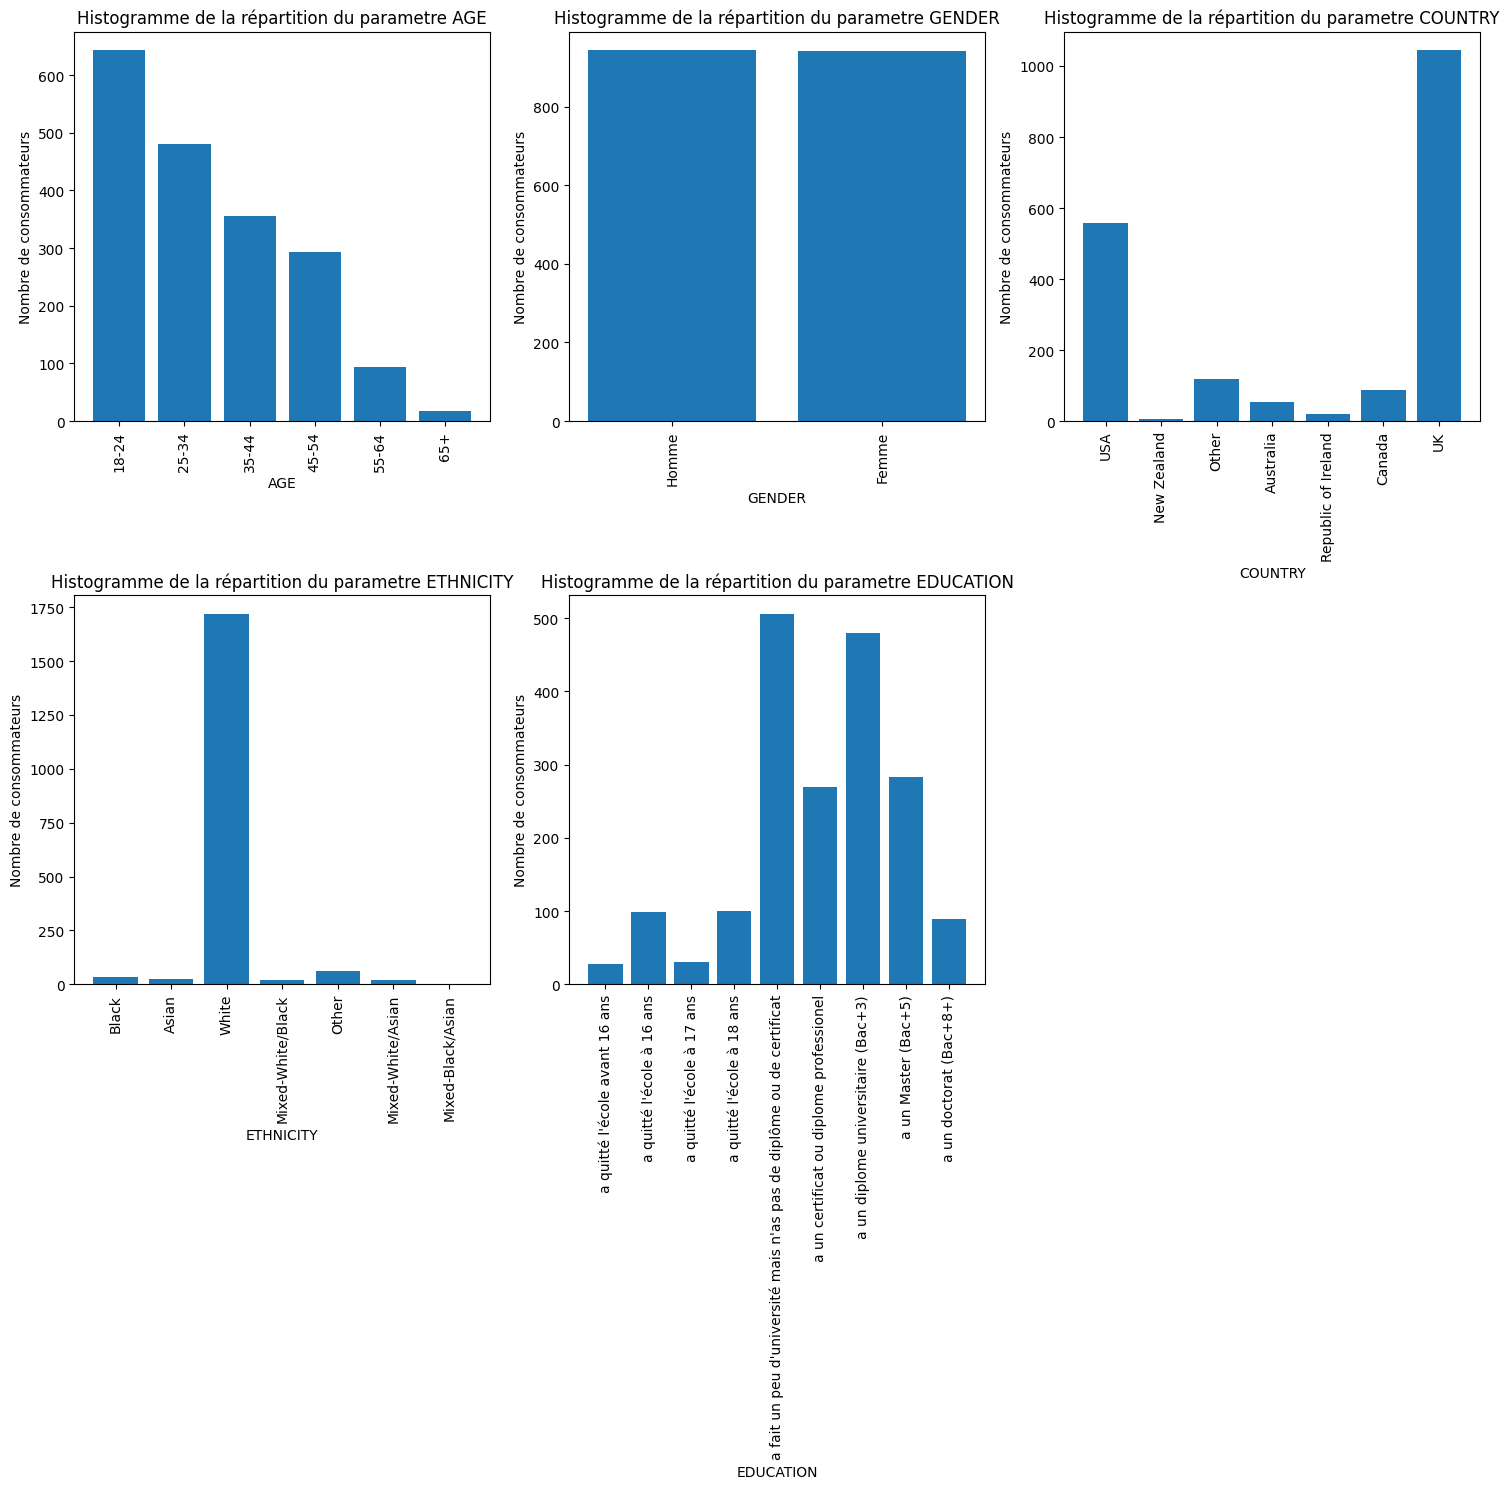

In [11]:
figure, ax = plt.subplots(2, 3, figsize=(15, 15))
parametres_a_afficher = ['AGE','GENDER','COUNTRY','ETHNICITY','EDUCATION']
for i, parametre in enumerate(parametres_a_afficher):
    ax[i//3,i%3].bar(QUALITATIVE_LABELS[parametre],np.unique(df[parametre], return_counts=True)[1])
    ax[i//3,i%3].set_title(f'Histogramme de la répartition du parametre {parametre}')
    ax[i//3,i%3].set_xlabel(parametre)
    ax[i//3,i%3].set_ylabel('Nombre de consommateurs')
    ax[i//3,i%3].set_xticks(QUALITATIVE_LABELS[parametre])
    ax[i//3,i%3].set_xticklabels(QUALITATIVE_LABELS[parametre],rotation=90)
figure.delaxes(ax[1][2])
plt.tight_layout()
plt.savefig('./image_matplotlib/histogrammes_qualitatifs.png')


Drogues dures : 
AMPHET
AMYL
BENZOS
COKE
CRACK
ECSTASY
HEROIN
LSD
---
Drogues douces : 
CANABIS
LEGALH
MUSHROOMS
Index(['AGE', 'GENDER', 'EDUCATION', 'COUNTRY', 'ETHNICITY', 'NSCORE',
       'ESCORE', 'OSCORE', 'ASCORE', 'CSCORE', 'IMPULSIVE', 'SS', 'ALCOHOL',
       'CAFF', 'CHOC', 'NICOTINE', 'Drogues Dures', 'Drogues Douces'],
      dtype='object')
Les 20 corrélations les plus élevées :
       Variable 1      Variable 2  Corrélation
39  Drogues Dures  Drogues Douces     0.648806
21      IMPULSIVE              SS     0.623120
8         COUNTRY  Drogues Douces     0.550937
7         COUNTRY   Drogues Dures     0.457654
30             SS  Drogues Douces     0.442830
2             AGE  Drogues Douces     0.438356
33       NICOTINE  Drogues Douces     0.435828
9          NSCORE          ESCORE     0.431051
32       NICOTINE   Drogues Dures     0.430024
14         OSCORE              SS     0.421709
29             SS   Drogues Dures     0.410888
16         OSCORE  Drogues Douces     0.391

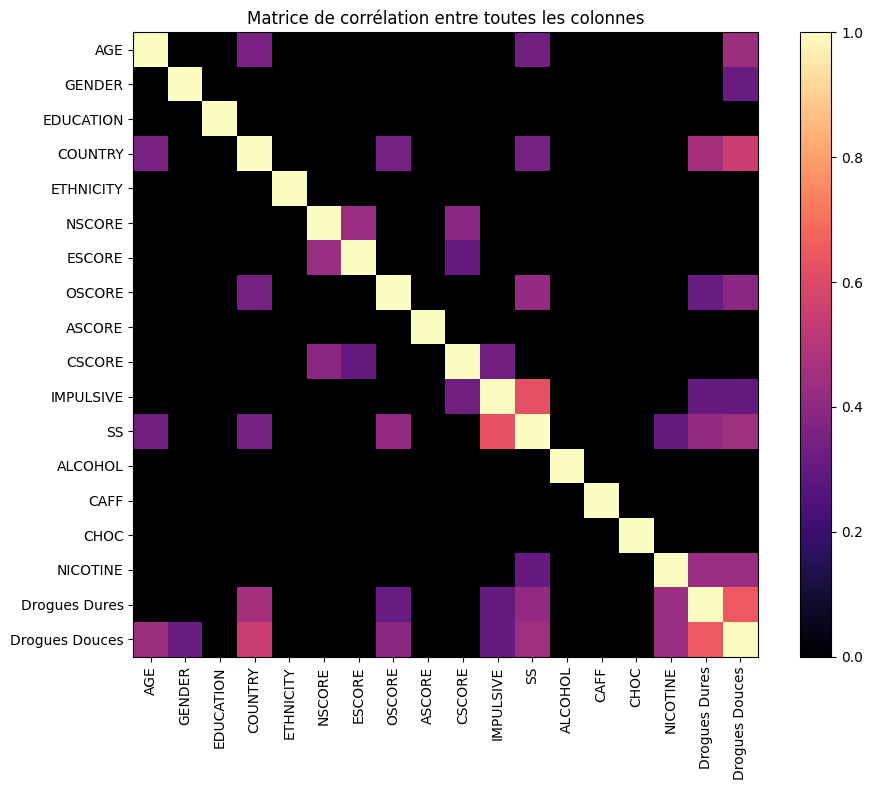

In [12]:
# On va construire un nouveau dataset en se basant sur celui ci
# On va regrouper toute les drogues dures en une variable et pareil pour les drogues douces

X = df

print("Drogues dures : ")
for i in [13,14,15,19,20,21,22,25]:
    print(X.columns[i])
print('---')
print("Drogues douces : ")
for i in [17,24,27]:
    print(X.columns[i])
    
# Colonnes des drogues dures :[13,14,15,19,20,21,22,23,25,26,29,30]
X['Drogues Dures'] = 0
for i in [13,14,15,19,20,21,22,23,25,26,29,30]:
    X['Drogues Dures'] += X.iloc[:,i]
median = X['Drogues Dures'].median()

# Discretiser
X['Drogues Dures'] = X['Drogues Dures'].apply(lambda x: 1 if x > median else 0)

#Colonnes des drogues douces : [17,24,27,28]
X['Drogues Douces'] = 0
for i in [17,24,27]:
    X['Drogues Douces'] += X.iloc[:,i]
median = X['Drogues Douces'].median()
# Discretiser
X['Drogues Douces'] = X['Drogues Douces'].apply(lambda x: 1 if x > median else 0)

# supprimer les colonnes 17,24,27,28,13,14,15,19,20,21,22,25
X = X.drop(X.columns[[13,14,15,19,20,21,22,23,25,26,29,17,24,27,30]], axis=1)
print(X.columns)

corr = X.corr()
# on met un seuil pour ne garder que les corrélations significatives
SEUIL = 0.3
corr = corr[(corr >= SEUIL) | (corr <= -SEUIL)]
# On remplace les NaN par 0
corr = corr.fillna(0)
# on fait la valeur absolue de la matrice de corrélation
corr = corr.abs()
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='magma', interpolation='none')

plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Matrice de corrélation entre toutes les colonnes')
plt.tight_layout()

corr_top = corr.unstack()
corr_top = corr_top[corr_top != 1]
corr_top = corr_top[corr_top > SEUIL]
corr_top = corr_top.reset_index()
corr_top.columns = ['Variable 1', 'Variable 2', 'Corrélation']
corr_top = corr_top.drop_duplicates(subset=['Corrélation'])
corr_top = corr_top.sort_values(by='Corrélation', ascending=False)
print("Les 20 corrélations les plus élevées :")
print(corr_top.head(20))




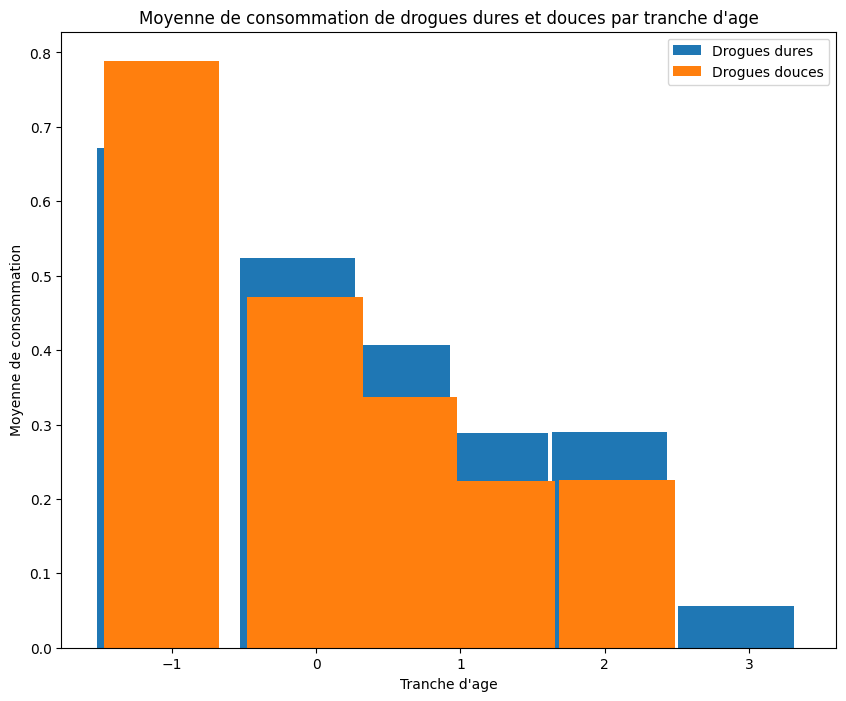

In [13]:
ages = X['AGE']
ethnies = X['ETHNICITY']
drogues_dures = X['Drogues Dures']
drogues_douces = X['Drogues Douces']

# recuperer les tranches d'age
tranches_age = np.unique(ages)

# recuperer les indices de chaque tranche d'age
indices = []
for i in range(len(tranches_age)):
    indices.append(np.where(ages == tranches_age[i])[0])
    
# calculer la moyenne de consommation de drogues dures et douces par tranche d'age
moyenne_drogues_dures = []
moyenne_drogues_douces = []
for i in range(len(tranches_age)):
    moyenne_drogues_dures.append(np.mean(drogues_dures[indices[i]]))
    moyenne_drogues_douces.append(np.mean(drogues_douces[indices[i]]))
# afficher les resultats
plt.figure(figsize=(10, 8))
plt.bar(tranches_age, moyenne_drogues_dures, label='Drogues dures')
plt.bar(tranches_age+0.05, moyenne_drogues_douces, label='Drogues douces')
plt.xlabel('Tranche d\'age')
plt.ylabel('Moyenne de consommation')
plt.title('Moyenne de consommation de drogues dures et douces par tranche d\'age')
plt.legend()

[0, 1, 2, 3, 4, 5]


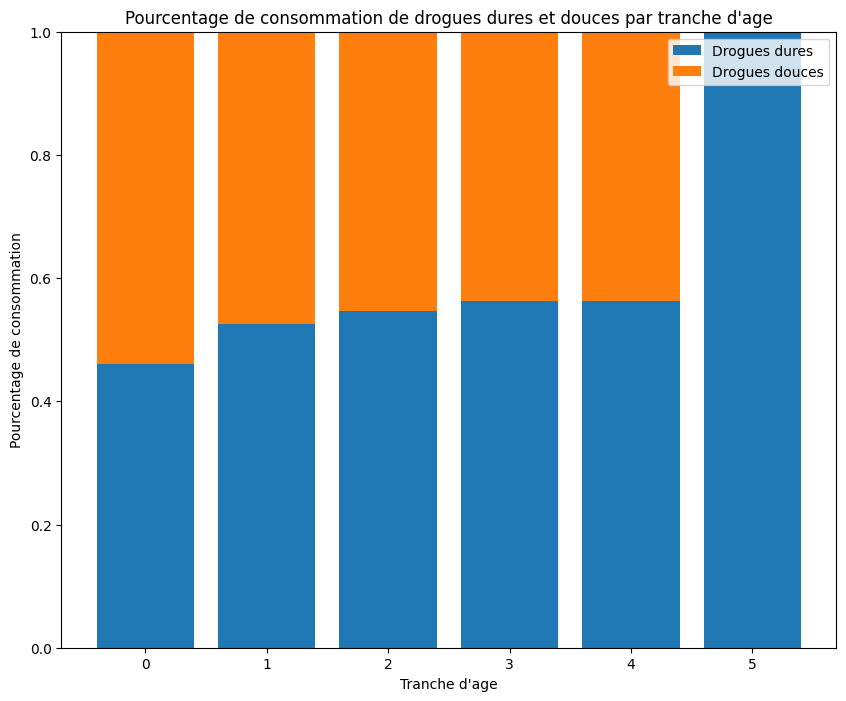

In [14]:

repartition = []
for i in range(len(tranches_age)):
    repartition.append([moyenne_drogues_dures[i], moyenne_drogues_douces[i]])
repartition = np.array(repartition)
repartition = repartition / repartition.sum(axis=1, keepdims=True)

tranches_age = [0,1,2,3,4,5]

print(tranches_age)
plt.figure(figsize=(10, 8))
# Barres pour drogues dures
plt.bar(tranches_age, repartition[:,0], label='Drogues dures')

# Barres pour drogues douces, empilées sur les drogues dures
plt.bar(tranches_age, repartition[:,1], bottom=repartition[:,0], label='Drogues douces')

plt.xlabel('Tranche d\'age')
plt.ylabel('Pourcentage de consommation')
plt.title('Pourcentage de consommation de drogues dures et douces par tranche d\'age')
plt.legend()
plt.show()

| Code | Signification                             |
|------|-------------------------------------------|
| CL0  | Jamais consommé                           |
| CL1  | Consommé il y a plus de 10 ans            |
| CL2  | Consommé dans l’année, mais pas récemment |
| CL3  | Consommé dans les 30 derniers jours       |
| CL4  | Consommé dans la semaine                  |
| CL5  | Consommé dans les 3 derniers jours        |
| CL6  | Consommé dans les 24 dernières heures     |


| Score   | Trait de personnalité | Signification                                      |
|---------|------------------------|---------------------------------------------------|
| Nscore  | Névrosisme             | Tendance à l’anxiété, à la dépression             |
| Escore  | Extraversion           | Ouverture sociale, enthousiasme                   |
| Oscore  | Ouverture              | Imagination, curiosité, créativité                |
| Ascore  | Agréabilité            | Altruisme, confiance envers les autres            |
| Cscore  | Conscience             | Autodiscipline, organisation                      |
| Impulsiveness et SS | ensation Seeking          | Sensations fortes, impulsivité, comportements à risques               |

| Variable    | Coefficient         |
|-------------|---------------------|
| NSCORE      | -0.131040           |
| ESCORE      | -0.279279           |
| OSCORE      |  0.705459           |
| ASCORE      | -0.116361           |
| CSCORE      | -0.370929           |
| IMPULSIVE   | -0.036630           |
| SS          |  0.756349           |




| Indicateur      | Valeur             |
|-----------------|--------------------|
| \( R2 \)       | 0.3161             |
| Erreur (MSE)    | 3.5764             |